#  口罩检测模型开发指导文档 

## 1. 介绍

Duration: 1 mins 

### 1.1 本文档目标

- 指导开发者使用已标注好的口罩检测数据集，利用华为云[ModelArts](https://support.huaweicloud.com/modelarts/index.html)的一键模型上线功能训练得到一个口罩检测模型
- 指导开发者在ModelArts Notebook中使用[ModelArts SDK](https://support.huaweicloud.com/sdkreference-modelarts/modelarts_04_0002.html)部署测试模型，可进行图片和视频的测试

### 1.2 您需要准备什么？

- 一台可联网的电脑（Windows，Mac或Linux操作系统）
- 谷歌浏览器

## 2. 准备工作

Duration: 10 mins

进行口罩检测模型的开发，需要完成以下准备工作

### 2.1 ModelArts准备工作

参考[此文档](https://github.com/huaweicloud/ModelArts-Lab/tree/master/docs/ModelArts%E5%87%86%E5%A4%87%E5%B7%A5%E4%BD%9C)完成ModelArts准备工作。

## 注意：体验本案例将会消耗云资源，云资源是先使用、后计费的模式，计费非实时，而是定期结算，账户余额、云资源包和代金券都在云资源的扣费范围内。在使用ModelArts时要及时检查账号状态，避免账号处于欠费或冻结状态时资源被冻结，影响您的使用。 

### 2.2 下载口罩检测数据集

[点此链接](https://modelarts-labs-bj4.obs.cn-north-4.myhuaweicloud.com/case_zoo/mask_detect/datasets/mask_detect_datasets.zip) 下载口罩检测数据集，将得到mask_detect_datasets.zip，解压得到mask_detect_datasets，其中的train目录是训练集，里面是图片和已经标注好的物体检测xml标签文件，test是测试集，里面有测试图片和视频。

### 2.3 上传数据集至OBS

（1）按照下图操作创建一个OBS桶，点击 添加桶 -》输入桶名（确保桶名符合命名规则）-》确定

![create_bucket](./imgs/create_bucket.PNG)

（2）按照下图上传数据集文件夹，点击 上传-》选择文件夹，选定前面解压的mask_detect_datasets目录 -》确定

![upload_dir](./imgs/upload_dir.PNG)

**至此，准备工作完成。**

## 3. ModelArts一键模型上线

准备好数据集之后，我们就可以到ModelArts上使用一键模型上线功能开始训练口罩检测模型，训练过程总共分两大步骤：数据集导入和作业参数配置。

[点此链接](https://console.huaweicloud.com/modelarts/?region=cn-north-4#/manage/dashboard)前往ModelArts北京四区域的控制台页面，依次按照下面的步骤进行模型的训练。
### 3.1 数据集导入

#### （1）按照下图创建数据集

![create_datasets_1](./imgs/create_datasets_1.PNG)

#### （2）按照下图中步骤指定数据输入位置

![create_datasets_2](./imgs/create_datasets_2.PNG)

#### （3）按照下图中步骤指定数据输出位置

![create_datasets_3](./imgs/create_datasets_3.PNG)

#### （4）按照下图中步骤选择物体检测，点击创建

![create_datasets_4](./imgs/create_datasets_4.PNG)

#### （5）等待数据集自动导入

点击创建后，ModelArts会自动从OBS中导入已经标注好的数据集，导入时间根据数据集大小而定，可以手动刷新页面查看最新的导入进度，如下图所示，等待进度达到100%。

![create_datasets_5](./imgs/create_datasets_5.PNG)

#### （6）上传未标注的图片进行标注（可选）

本步骤为可选步骤，跳过本步不影响整个案例的完成。

本案例提供了已经标注好的数据集用于训练，那么如何上传新的未标注图片加入训练呢？只需要两个步骤：上传图片到OBS、手工标注图片。

上面第（2）步，我们选定了OBS上的"obs://mask-detect-0211/mask_detect_datasets/train/"路径作为数据输入位置，那么未标注图片也要上传到该位置，按照下图中步骤进行图片的上传，注意一次最多上传500张图

![add_new_img_1](./imgs/add_new_img_1.PNG)

等待图片上传完成后，再回到ModelArts，点击上面第（5）步创建的数据集名称，进入到数据集详情页面，如下图所示，点击开始标注

![add_new_img_2](./imgs/add_new_img_2.PNG)

再依次点击 未标注-》同步数据源，等待数据同步完成，将会看到显示的图片

![add_new_img_3](./imgs/add_new_img_3.PNG)

点击图片，将进入数据标注页面，如下图所示，标注工具的详细用法请[点此链接](https://support.huaweicloud.com/engineers-modelarts/modelarts_23_0012.html)查看

![add_new_img_4](./imgs/add_new_img_4.PNG)

所有图片标注完成后，依次点击 返回数据标注预览-》返回数据集预览-》返回数据集列表，此时已完成了新图片的标注工作，您可以再次点击 一键模型上线-》任务创建 开始新的训练任务。

### 3.2 作业参数配置

#### （1）创建一键模型上线任务

按照下图点击 一键模型上线 -》任务创建

![auto_deploy_1](./imgs/auto_deploy_1.PNG)

#### （2）配置作业参数

按照下图修改作业名称，选择预置算法，设置算法参数。本案例直接使用默认的预置算法、默认的算法参数即可，

直接使用默认的配置也可以得到较好的模型训练效果。

![auto_deploy_2](./imgs/auto_deploy_2.PNG)

#### （3）指定训练输出位置

按照下图选择训练输出位置

![auto_deploy_3](./imgs/auto_deploy_3.PNG)

按照下图步骤新建一个train_output目录

![auto_deploy_4](./imgs/auto_deploy_4.PNG)

#### （4）指定作业日志路径

按照下图选择作业日志路径

![auto_deploy_5](./imgs/auto_deploy_5.PNG)

按照下图步骤新建一个train_log目录

![auto_deploy_6](./imgs/auto_deploy_6.PNG)

#### （5）参数配置完成，如下图所示，点击下一步，提交

![auto_deploy_7](./imgs/auto_deploy_7.PNG)

#### （6）等待作业训练完成，预计总耗时需30分钟左右

![auto_deploy_8](./imgs/auto_deploy_8.PNG)

如果在等待过程中退出了该网页，可以按照下图 数据集-》一键模型上线-》任务历史，重新进入任务页面查看任务详情：

![auto_deploy_9](./imgs/auto_deploy_9.PNG)


**至此，模型训练任务完成。**

回顾一下整个训练过程，我们只需要准备标注好的训练数据集，然后使用ModelArts的一键模型上线功能，进行一些参数配置，后台就会自动开始模型训练，在训练完之后，会将模型保存到OBS，并将模型部署成在线服务，整个过程是零代码开发，非常方便。

## 4. 模型测试

一键模型上线任务完成之后，将会创建一个在线服务，这个在线服务是将模型进行了部署，并可以通过在线API的形式获取到模型的预测能力。

按照下图找到以"mask_detect_demo"前缀为名的服务名称，这个前缀就是我们创建一键部署任务时取的名字

![auto_deploy_10](./imgs/auto_deploy_10.PNG)

点击服务名称进入到在线服务详情页面，如下图所示，依次点击预测-》上传-》预测，即可以实现一张图片的预测，由于该在线服务默认是用CPU部署，所以预测较慢一些，使用GPU部署可以加快预测。

![auto_deploy_11](./imgs/auto_deploy_11.PNG)

## 5. Notebook交互式开发调试

为了进一步地测试模型的能力，我们可以使用ModelArts的高级功能——Notebook交互式开发调试工具，来做图片的预测和视频的预测。Notebook简介请[点此链接](https://support.huaweicloud.com/engineers-modelarts/modelarts_23_0033.html)进行查看。

### 5.1 创建Notebook

我们需要先创建一个Notebook，按照下图创建

![create_notebook_1](./imgs/create_notebook_1.PNG)

再按照下图进行配置，选择GPU -》P100，下一步，提交，大约两分钟后创建好。

![create_notebook_2](./imgs/create_notebook_2.PNG)

等待Notebook的状态变为“运行中”，然后点击Notebook名称进入到Notebook，进去将看到一个空的工作空间，如下图所示：

![create_notebook_3](./imgs/create_notebook_3.PNG)

### 5.2 创建ipynb脚本

我们需要创建一个交互式开发脚本——ipynb脚本，按照下图中步骤，点击右上角的"New"，然后选择TensorFlow 1.8。之所以选择TensorFlow1.8是因为前面的一键模型上线步骤中选择的预置算法是使用TensorFlow1.8的AI引擎，如果您选择了其他预置算法，则需要更改为相应的AI引擎，每个预置算法使用的引擎类型，可以[点此查看](https://support.huaweicloud.com/engineers-modelarts/modelarts_23_0158.html)。

![create_ipynb_1](./imgs/create_ipynb_1.PNG)

这时就已经成功创建了一个空的ipynb脚本，按照下图中步骤，点击左上方的文件名"Untitled"，并输入一个与本案例相关的名称，如"mask_detect"。

![create_ipynb_2](./imgs/create_ipynb_2.PNG)

### 5.3 学习ipynb的基本用法

ipynb的基本用法，请参考下图，您可以手动输入 print('Hello, ModelArts')，然后点击快捷功能键的“Run”按钮或按下Ctrl+Enter键运行。

![run_ipynb_1](./imgs/run_ipynb_1.PNG)

快捷功能键的作用从左往右，依次是“保存当前脚本”、“新建一个Cell”、“剪切一个Cell”（也可用于删除一个Cell）、“拷贝一个Cell”、“粘贴一个Cell”、“把当前Cell往上移动一步”、“把当前Cell往下移动一步”、“停止当前Cell的执行”、“重启当前脚本的内核”（内核就是运行环境，即右上角的AI引擎）、“切换当前Cell的类型”（支持Code、Markdown等类型）、“打开命令调色板”（基本极少用到）、“将ipynb脚本转换成python脚本”。

好，到目前为止，您已经掌握了ipynb的基本用法，下面我们开始使用代码来测试口罩检测模型。

In [1]:
print('Hello, ModelArts!')

Hello, ModelArts!


### 5.4 执行ipynb脚本

本案例的ipynb脚本分6个功能模块：

（1）获取模型id

（2）下载测试数据

（3）部署环境初始化

（4）模型初始化

（5）图片测试

（6）视频测试

下面我们开始进入到脚本执行环节。

#### （1）获取模型id
进行模型部署之前，我们需要指定部署哪一个模型，按照下图步骤，找到以"mask_detect_demo"前缀为名的服务名称，这个前缀就是我们创建一键模型上线任务时取的名字

![model_id_1](./imgs/model_id_1.PNG)

点击模型名字，进入到模型详情页面，按照下图找到 id，这就是模型id，复制，填写到下面的test_model_id参数中。

![model_id_2](./imgs/model_id_2.PNG)

In [2]:
test_model_id = "92b7dfab-ce58-4aba-995c-778eac825d80"

#### （2）下载测试数据
本案例提供了部分测试数据，直接运行下面的Cell即可下载到Notebook

In [3]:
import os
import shutil
import moxing as mox
if not os.path.exists('mask_detect_datasets'):
    mox.file.copy('s3://modelarts-labs-bj4/case_zoo/mask_detect/datasets/mask_detect_datasets.zip', './mask_detect_datasets.zip')
    os.system("unzip mask_detect_datasets.zip")
    os.system("rm mask_detect_datasets.zip")

INFO:root:Using MoXing-v1.14.1-ddfd6c9a
INFO:root:Using OBS-Python-SDK-3.1.2


#### （3）部署环境初始化
a)  注意，本步骤在打开ipynb后只需要运行一次即可，不需要运行多次

b) 本步骤的运行时长依赖于您的网络状况，请留意当前Cell的运行结果输出，如果看到“Successfully configure tensorflow local inference environment”，则表示环境初始化成功

In [4]:
from modelarts.session import Session
from modelarts.model import Model
from modelarts.config.model_config import ServiceConfig
session = Session()

In [5]:
Model.configure_tf_infer_environ(device_type='GPU')  # 如果不是使用 TF 训练的模型，则屏蔽这一行

Configuring tensorflow local inference environment ... 
Successfully configure tensorflow local inference environment


#### （4）模型初始化
a) 注意本步骤在打开ipynb后只需要运行一次即可，不需要运行多次

b) 本步骤的运行时长依赖于您的网络状况，请留意当前Cell的运行结果输出，如果看到“Successfully deployed the local service.”，则表示模型初始化成功

In [6]:
model_instance = Model(session, model_id=test_model_id)
configs = [ServiceConfig(model_id=model_instance.model_id, weight="100", specification="local", instance_count=1)]
predictor_instance = model_instance.deploy_predictor(configs=configs)

Service name is service-0224-181528


INFO:obs:Successfully download file mask-detect-0211/train_output/model/checkpoint from OBS to local /home/ma-user/modelarts/model_location/model_id_92b7dfab-ce58-4aba-995c-778eac825d80/1/checkpoint
INFO:obs:Successfully download file mask-detect-0211/train_output/model/config.json from OBS to local /home/ma-user/modelarts/model_location/model_id_92b7dfab-ce58-4aba-995c-778eac825d80/1/config.json


model_local_path is /home/ma-user/modelarts/model_location/model_id_92b7dfab-ce58-4aba-995c-778eac825d80/


INFO:obs:Successfully download file mask-detect-0211/train_output/model/customize_service.py from OBS to local /home/ma-user/modelarts/model_location/model_id_92b7dfab-ce58-4aba-995c-778eac825d80/1/customize_service.py
INFO:obs:Successfully download file mask-detect-0211/train_output/model/faster_rcnn_resnet50_voc07.config from OBS to local /home/ma-user/modelarts/model_location/model_id_92b7dfab-ce58-4aba-995c-778eac825d80/1/faster_rcnn_resnet50_voc07.config
INFO:obs:Successfully download file mask-detect-0211/train_output/model/index from OBS to local /home/ma-user/modelarts/model_location/model_id_92b7dfab-ce58-4aba-995c-778eac825d80/1/index
INFO:obs:Successfully download file mask-detect-0211/train_output/model/model.ckpt-6524.data-00000-of-00001 from OBS to local /home/ma-user/modelarts/model_location/model_id_92b7dfab-ce58-4aba-995c-778eac825d80/1/model.ckpt-6524.data-00000-of-00001
INFO:obs:Successfully download file mask-detect-0211/train_output/model/model.ckpt-6524.index from

Successfully download file mask-detect-0211/train_output/model from OBS to local /home/ma-user/modelarts/model_location/model_id_92b7dfab-ce58-4aba-995c-778eac825d80/1/
local_service_port is 127.0.0.1:6060
Deploying the local service ...
Successfully deployed the local service.


#### （5）图片测试

In [7]:
import cv2
import json
import numpy as np
import PIL.Image as pil_Image

def detect_img_and_show(img):
    predict_result = predictor_instance.predict(data=img, data_type='images')
    predict_result = json.loads(predict_result, encoding='utf8')
    classes = predict_result.get('detection_classes', None)
    boxes = predict_result.get('detection_boxes', None)
    scores = predict_result.get('detection_scores', None)
    if classes is not None:
        img_copy = np.array(img.convert('RGB')).copy()
        for i in range(len(classes)):  # 绘制水平框
            box = boxes[i]
            y1, x1, y2, x2 = [int(float(v)) for v in box]
            cv2.rectangle(img_copy, (x1, y1), (x2, y2), (0, 255, 0), thickness=2)
            text = classes[i] + '-%s' % str(float(scores[i]) * 100)[:4] + '%'
            cv2.putText(img_copy, text, (x1, y1 - 3), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 1)  # 绘制标签名
    return classes, img_copy

开始图片测试

['no_mask']


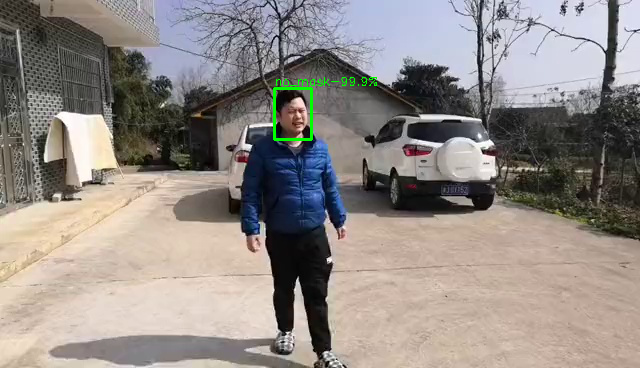

In [8]:
file_path = 'mask_detect_datasets/test/no_1.jpg'
classes, img_show = detect_img_and_show(pil_Image.open(file_path))
print(classes)
pil_Image.fromarray(img_show)  # 显示图片

修改图片路径，换一张图片进行测试

['yes_mask', 'no_mask']


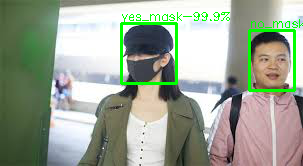

In [9]:
file_path = 'mask_detect_datasets/test/yes_no_5.jpg'
classes, img_show = detect_img_and_show(pil_Image.open(file_path))
print(classes)
pil_Image.fromarray(img_show)  # 显示图片

至此，您已经完成了图片的测试，您还可以上传自己的图片进行测试。

下一步，我们将进行视频的测试。

#### （6）视频测试

In [10]:
import ipywidgets
from IPython.display import clear_output, Image, display

# 定义视频读取函数
def read_video(input_video_path, video_start_time, video_end_time):
    cap = cv2.VideoCapture(input_video_path)  # 打开视频
    total_frame_num = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # 获取视频总帧数
    fps = cap.get(cv2.CAP_PROP_FPS)  # 视频帧率
    s_time_split = video_start_time.split(':')
    start_time = int(s_time_split[0]) * 3600 + int(s_time_split[1]) * 60 + int(s_time_split[2])
    e_time_split = video_end_time.split(':')
    end_time = int(e_time_split[0]) * 3600 + int(e_time_split[1]) * 60 + int(e_time_split[2])
    start_frame_id = int(start_time * fps)  # 设置需要处理的开始帧
    end_frame_id = int(end_time * fps)  # 设置需要处理的结束帧
    if end_frame_id > total_frame_num:
        end_frame_id = total_frame_num - 1
    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame_id)  # 设置开始帧
    return cap, start_frame_id, end_frame_id

In [11]:
input_video_path = 'mask_detect_datasets/test/yes_mask.mp4'  # 输入视频所在的路径
video_start_time = '00:00:00'  # 设置需要处理的视频开始时间，按照2位数字'时:分:秒'的格式进行填写
video_end_time = '00:00:06'    # 设置需要处理的视频结束时间，按照2位数字'时:分:秒'的格式进行填写

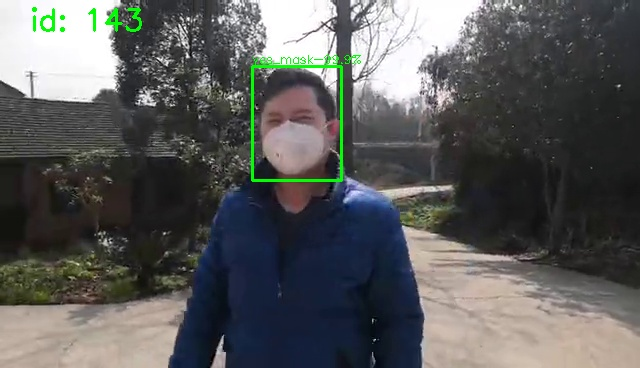

end


In [12]:
cap, start_frame_id, end_frame_id = read_video(input_video_path, video_start_time, video_end_time)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # 获取视频画面宽度
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # 获取视频画面高度

for frame_id in range(start_frame_id + 1, end_frame_id + 1):
    clear_output(wait=True)
    ret, frame = cap.read()
    pil_frame = pil_Image.fromarray(frame[:, :, ::-1])
    classes, img_show = detect_img_and_show(pil_frame)
    cv2.putText(img_show, 'id: ' + str(frame_id), (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)  # 画frame_id
    img_show = img_show[:, :, ::-1]
    display(Image(data=cv2.imencode('.jpg', img_show)[1]))
print('end')


## 6 处理扣费项目

### 云服务在业界都是先使用后计费的模式，计费并非实时，而是定期结算。

### 案例完成后，为了防止继续扣费，需要做两件事：停止在线服务、清除OBS资源

### 6.1 停止在线服务

按照下图，点击“停止”按钮即可，在线服务停止后可以重新启动。

![close_online_service](./imgs/close_online_service.PNG)

### 6.2 清除OBS资源

清除方法：登录[OBS管理控制台](https://storage.huaweicloud.com/obs/#/obs/manager/buckets)，找到您在前面步骤新建的桶，比如“mask-detect-0211”，点击桶名进入概览页面，点击左侧导航栏的“对象”，先选中您需要删除的文件夹，点击删除，然后再删除桶。

## 恭喜您

恭喜您，您已经使用ModelArts完成了口罩检测模型的开发测试任务！ 

### 接下来您可以

- 搜集更多的口罩检测图片来重新创建一个一键模型上线任务；
- 使用其他业务场景的图片来训练一个其他的目标检测任务。

### 参考文献

-  [ModelArts FAQ](https://github.com/huaweicloud/ModelArts-Lab/blob/master/docs/faqs.md)
-  [管理数据](https://support.huaweicloud.com/engineers-modelarts/modelarts_23_0002.html)
-  [一键模型上线](https://support.huaweicloud.com/engineers-modelarts/modelarts_23_0184.html)
-  [Notebook简介](https://support.huaweicloud.com/engineers-modelarts/modelarts_23_0033.html)
-  [什么是对象存储服务](https://support.huaweicloud.com/productdesc-obs/zh-cn_topic_0045829060.html)